In [38]:
 # 사용할 모듈 import 하기
 
import random
import numpy as np
import matplotlib.pyplot as plt

Test

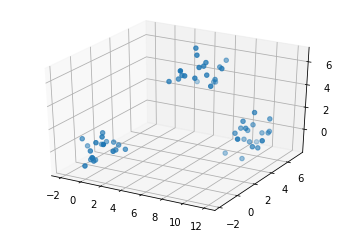

In [46]:
# 데이터 생성 

k= 3
points = [np.random.randn(k) for _ in range(20)] #list
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points) #array.  -> 60개



fig=plt.figure()
ax=fig.gca(projection="3d")
ax.scatter(points[:,0],points[:,1],points[:,2])

plt.show()

##K-Means
  return labels, centroids <br>
  label[i]는 points[i]가 어디에 각각 속하는지 cluster 번호<br>
  centroids[j]는 j번째 cluster의 center(중심)
  
  
  1. random 하게 중심점 선택 (forgy: 데이터에서 랜덤하게 점 선택)
  2. 각 점이 어느 중심점에 가장 가까운지 계산
  3. 각각의 중심점에 속한 점들을 평균내 새 중심점 계산
  4. 2-3 반복하다 더이상 cluster 반복 x -> 종료!
  

In [48]:
def euclidean_distance(a,b):
  return ((a-b)**2).sum()**0.5

def kmeans(k, points,max_iters=10):
  #1. 데이터에서 랜덤하게 점 선택 (중심)
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
  labels=np.full(points.shape[0],-1)
  #2. 모든 점에 대해 어느 점에 가까운 지 계산
  for iter in range(max_iters):
    for pid, p in enumerate(points):
      min_dist=np.inf
      min_cid=-1
      
      for cid,c in enumerate(centroids):
        dist=euclidean_distance(p,c)
        if dist<min_dist:
          min_dist=dist
          min_cid=cid
      labels[pid]=min_cid

    #3. 각 중심점에서 새 중심점
    new_centroids=np.zeros_like(centroids)
    counts=np.zeros(k,dtype=np.int32)

    for l, p in zip(labels,points):
      new_centroids[l]+=p
      counts[l]+=1 #해당 클러스터의 몇개의 점?

    for i in range(k):
      new_centroids[i]/=counts[i] #새 centroids
  
    if np.array_equal(new_centroids,centroids): break
    else: centroids=new_centroids

    return labels,centroids

In [49]:
labels, centroids= kmeans(3,points)
print(labels)
print(centroids)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 2 0 2 2 1 2 2 2 1 2 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
[[8.83013653 4.87422942 2.91760023]
 [8.81724367 5.28540331 1.31460351]
 [1.45239087 1.48712347 1.67179395]]


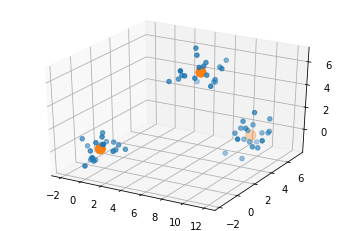

In [60]:
label, centroids= kmeans(3,points)
fig=plt.figure()
ax=fig.gca(projection="3d")
ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],s=100)

plt.show()

In [61]:
k=3
max_iters=10
labels=[]
#1. 데이터에서 랜덤하게 점 선택 (중심)
centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
labels=np.full(points.shape[0],-1)
#2. 모든 점에 대해 어느 점에 가까운 지 계산
for iter in range(max_iters):
  for pid, p in enumerate(points):
    min_dist=np.inf
    min_cid=-1
    
    for cid,c in enumerate(centroids):
      dist=euclidean_distance(p,c)
      if dist<min_dist:
        min_dist=dist
        min_cid=cid
    labels[pid]=min_cid

  #3. 각 중심점에서 새 중심점
  new_centroids=np.zeros_like(centroids)
  counts=np.zeros(k,dtype=np.int32)

  for l, p in zip(labels,points):
    new_centroids[l]+=p
    counts[l]+=1 #해당 클러스터의 몇개의 점?

  for i in range(k):
    new_centroids[i]/=counts[i] #새 centroids
  print("before: ",centroids)
  print("after: ",new_centroids)
  if np.array_equal(new_centroids,centroids): break
  else: centroids=new_centroids

before:  [[ 8.31216235e+00  4.18527519e+00 -1.27807153e+00]
 [ 1.55139954e+00 -6.50216138e-01  1.11681061e-02]
 [ 1.12822320e+01  5.61477063e+00  4.19062224e-01]]
after:  [[6.07162174 5.30089641 3.58588315]
 [0.72005811 0.55568764 0.79178183]
 [9.97752284 5.13843756 1.13419622]]
before:  [[6.07162174 5.30089641 3.58588315]
 [0.72005811 0.55568764 0.79178183]
 [9.97752284 5.13843756 1.13419622]]
after:  [[ 4.87616953  5.28367149  4.90964302]
 [-0.03771923 -0.33177162 -0.22032988]
 [10.20227138  4.87306545  0.36919143]]
before:  [[ 4.87616953  5.28367149  4.90964302]
 [-0.03771923 -0.33177162 -0.22032988]
 [10.20227138  4.87306545  0.36919143]]
after:  [[ 4.87616953  5.28367149  4.90964302]
 [-0.03771923 -0.33177162 -0.22032988]
 [10.20227138  4.87306545  0.36919143]]


# 사진 불러오기

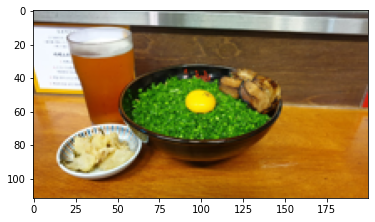

In [62]:
from PIL import Image

img=Image.open("maje.jpeg")
width=200
height=int(img.height*width/img.width)

img=img.resize((width,height))
plt.imshow(img)


pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어



labels,centroids=kmeans(10,pixels)
centroids=centroids.astype(np.int32)

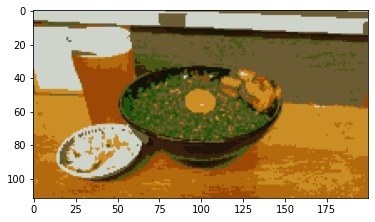

In [63]:
for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

# sk

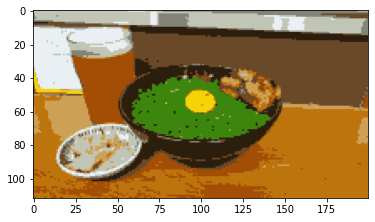

In [64]:
from sklearn.cluster import KMeans
pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어

kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)
labels,centroids=kmeans.labels_,kmeans.cluster_centers_

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]



for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
   pixels[i] = kmeans.cluster_centers_[a]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()


In [65]:
def euclidean_distance(a,b):
  return ((a-b)**2).sum()**0.5

def kmeans(k, points,max_iters=10):
  #1. 데이터에서 랜덤하게 점 선택 (중심)
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
  labels=np.full(points.shape[0],-1)
  #2. 모든 점에 대해 어느 점에 가까운 지 계산
  for iter in range(max_iters):
    for pid, p in enumerate(points):
      min_dist=np.inf
      min_cid=-1
      
      for cid,c in enumerate(centroids):
        dist=euclidean_distance(p,c)
        if dist<min_dist:
          min_dist=dist
          min_cid=cid
      labels[pid]=min_cid

    #3. 각 중심점에서 새 중심점
    new_centroids=np.zeros_like(centroids)
    counts=np.zeros(k,dtype=np.int32)

    for l, p in zip(labels,points):
      new_centroids[l]+=p
      counts[l]+=1 #해당 클러스터의 몇개의 점?

    for i in range(k):
      new_centroids[i]/=counts[i] #새 centroids
  
    if np.array_equal(new_centroids,centroids): break
    else: centroids=new_centroids

    return labels,centroids

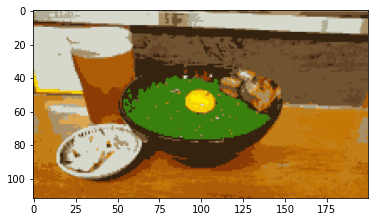

In [66]:
#k 늘이기
pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어



labels,centroids=kmeans(15,pixels)
centroids=centroids.astype(np.int32)

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

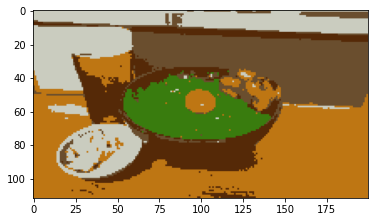

In [67]:
#k 줄이기
pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어



labels,centroids=kmeans(5,pixels)
centroids=centroids.astype(np.int32)

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

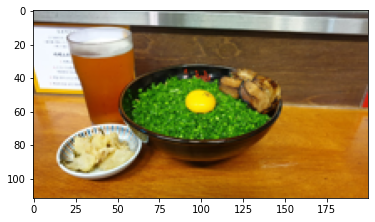

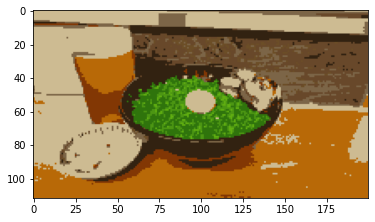

In [68]:
#max_iter 늘이기

plt.imshow(img)
plt.show()
pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어



labels,centroids=kmeans(10,pixels,max_iters=100)
centroids=centroids.astype(np.int32)

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

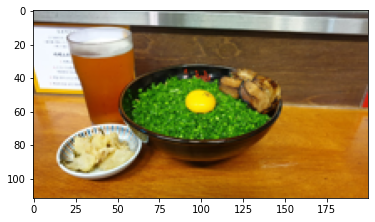

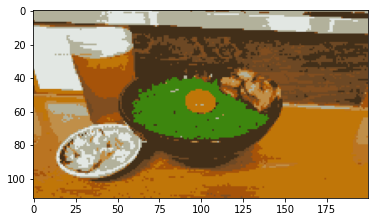

In [69]:
#max_iter 줄이기

plt.imshow(img)
plt.show()
pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어



labels,centroids=kmeans(10,pixels,max_iters=3)
centroids=centroids.astype(np.int32)

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

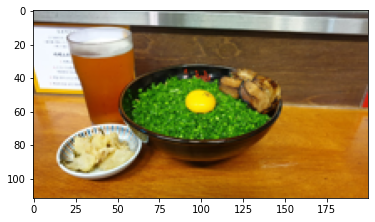

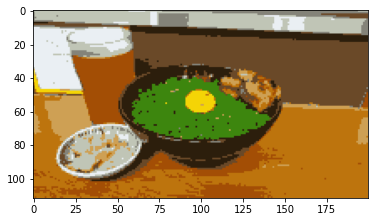

In [70]:
#n_cluster 조정

plt.imshow(img)
plt.show()

pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어

kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)
labels,centroids=kmeans.labels_,kmeans.cluster_centers_

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]



for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
   pixels[i] = kmeans.cluster_centers_[a]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

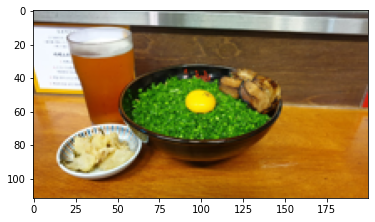

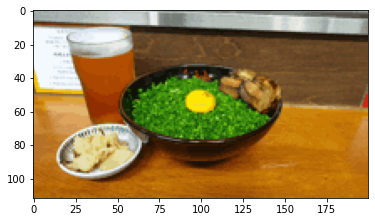

In [71]:
plt.imshow(img)
plt.show()

pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어

kmeans = KMeans(n_clusters=100)
kmeans.fit(pixels)
labels,centroids=kmeans.labels_,kmeans.cluster_centers_

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]



for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
   pixels[i] = kmeans.cluster_centers_[a]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show() #제일 비슷!

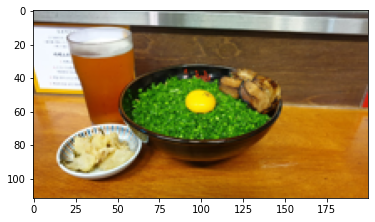

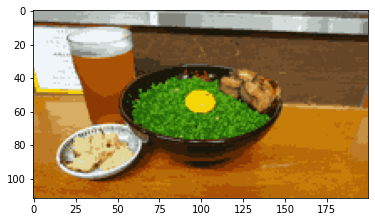

In [72]:
plt.imshow(img)
plt.show()

pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어

kmeans = KMeans(n_clusters=25)
kmeans.fit(pixels)
labels,centroids=kmeans.labels_,kmeans.cluster_centers_

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]



for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
   pixels[i] = kmeans.cluster_centers_[a]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()

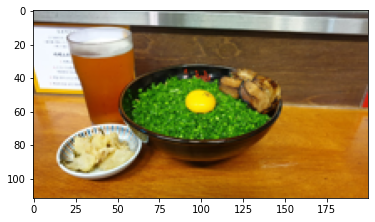

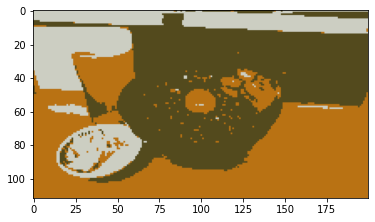

In [73]:
plt.imshow(img)
plt.show()

pixels=np.array(img).reshape(-1,3).astype(np.float32) #3개씩 묶어

kmeans = KMeans(n_clusters=3)
kmeans.fit(pixels)
labels,centroids=kmeans.labels_,kmeans.cluster_centers_

for l,pid in zip(labels,range(pixels.shape[0])):
  pixels[pid]=centroids[l]



for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
   pixels[i] = kmeans.cluster_centers_[a]

im_remastered=Image.fromarray(pixels.reshape((height,width,3)).astype(np.int8),'RGB')
plt.imshow(im_remastered)
plt.show()